# Time and zonal mean anomalies from a control run

Load modules

In [1]:
using Plots
using NCDatasets
using Statistics: mean

Setup run-time enviromnent

In [2]:
ENV["GKSwstype"] = "100"

"100"

useful functions

In [3]:
function get_timezonal_mean(file_name, var_name, t_spinup,nan_fill_value);
    ds = NCDataset(file_name, "r");
    lon = ds["long"][:];
    lat = ds["lat"][:];
    z = ds["level"][:] / 1e3; # height in kilometers
    time = ds["time"][:];
    var = ds[var_name][:];
    var=var[:, :, :, t_spinup:end]; # cut out the spinup;
    data_mean = mean(  mean( var[:,:,:,:], dims=4), dims=1); # lon, lat,lev, time
    replace!(data_mean, NaN=>nan_fill_value)
    return lat, z , data_mean
    none
end

function get_min_max(var);
    #replace!(var, NaN=>nan_fill_value)
    vmax = maximum(filter(!isnan,var))
    vmin = minimum(filter(!isnan,var))
    return vmin-1e-10,vmax+1e-10
    none
end

get_min_max (generic function with 1 method)

Select the variable to plot

In [4]:
CLIMA_NETCDF = "../netcdf/"; #location of .nc files
var_name_list = Any["u","temp"];
plot_anomaly = true;
nan_fill_value = 0
t_spinup = 1

1

Get the current and previous  GCM netcdf file names in the CLIMA_NETCDF directory

In [5]:
fnames = filter(x -> occursin(".nc", x), readdir( CLIMA_NETCDF ) );

nexp = size(fnames)[1]
nvar = size(var_name_list)[1]

2

exptract data and calculate anomalise from ctrl (assumes to be fnames[1] here)

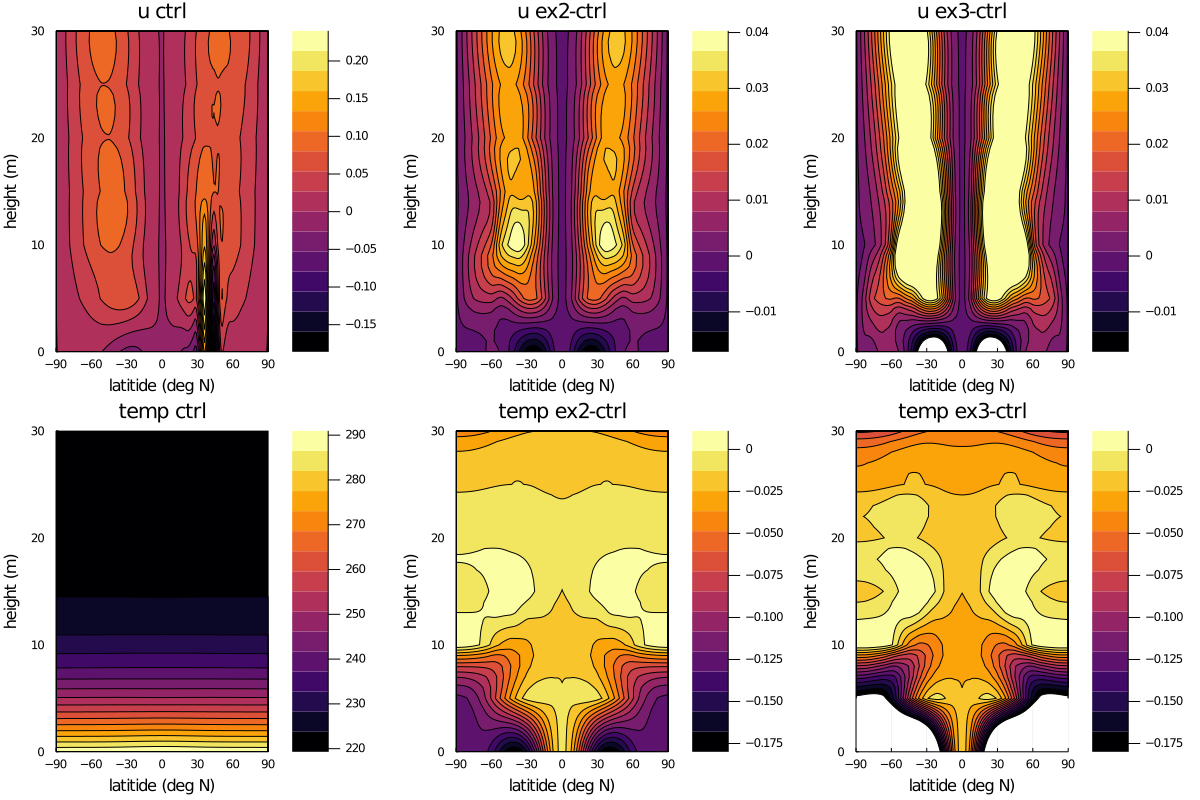

In [6]:
plot_array = Any[];
for n in 1:nvar
    title_v = var_name_list[n]
    lat, z , vs_ctrl = get_timezonal_mean( "$CLIMA_NETCDF/"fnames[1], var_name_list[n], t_spinup, nan_fill_value)
    clims = get_min_max(vs_ctrl)
    for i in 1:nexp
        if i ==1
            title = title_v*" ctrl"
            one_plot = contourf( lat, z, (vs_ctrl[1,:,:,1])', title = title, ylabel="height (m)", xlabel="latitide (deg N)", clims = clims);
        else
            title = title_v*" ex$i-ctrl"
            lat, z , vs = get_timezonal_mean( "$CLIMA_NETCDF/"fnames[i], var_name_list[n], t_spinup, nan_fill_value);
            if i ==2
                clims =get_min_max(vs-vs_ctrl)
            end
            one_plot = contourf( lat, z, ((vs-vs_ctrl)[1,:,:,1])', title = title, ylabel="height (m)", xlabel="latitide (deg N)", clims = clims);
        end
        push!(plot_array,one_plot); # make a plot and add it to the plot_array
    end
end

fig=plot(plot_array... , layout=(nvar,nexp), size=(nexp*400, nvar*400) )
savefig(fig, string("plot_timezonal_mean_anom.pdf"));
display(fig)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*